# Exploración de los datos

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

## Cargar los datos

In [102]:
path = r"../data/raw/consumo_casa.csv"

In [103]:
df_desagregado = pd.read_csv(path).drop("Unnamed: 0", axis=1)
df_desagregado.head()

,Fecha,Medidor [W],Refrigerator,Clothes washer,Clothes Iron,Computer,Oven,Play,TV,Sound system
0,2017-06-07 0:00,228.887,134.6,1.0,0.0,0.3,0.1,0.0,0.0,0.1
1,2017-06-07 0:01,231.814,134.6,0.2,0.0,0.3,0.2,0.0,0.0,0.1
2,2017-06-07 0:02,230.971,131.3,0.3,0.0,0.3,0.0,0.0,0.0,1.0
3,2017-06-07 0:03,231.878,131.3,0.0,0.5,0.1,0.0,1.1,0.1,1.0
4,2017-06-07 0:04,189.225,0.0,0.1,0.0,0.0,0.1,0.0,0.6,0.1


In [104]:
# profile = ProfileReport(df_desagregado)
# profile

In [105]:
# profile.to_file("../reports/report")

## Exploración del DataFrame

In [106]:
df_desagregado.shape

(194123, 10)

In [107]:
df_desagregado.describe()

,Medidor [W],Refrigerator,Clothes washer,Clothes Iron,Computer,Oven,Play,TV,Sound system
count,194123.000000,194123.000000,194123.000000,194123.000000,194123.000000,194123.000000,194123.000000,194123.000000,194123.000000
mean,284.337465,57.508366,4.234783,4.541936,1.335831,5.688060,0.945553,9.977765,3.559746
std,355.066930,71.010637,26.762249,61.315247,5.846712,88.430616,1.452993,22.978044,2.266801
min,30.658000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,89.915000,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.900000
50%,175.799000,1.200000,0.700000,0.200000,0.200000,0.200000,0.200000,0.200000,4.500000
75%,242.910000,131.400000,1.300000,0.600000,1.000000,1.000000,1.100000,1.100000,5.400000
max,1992.216000,843.800000,547.800000,1120.900000,62.300000,1682.700000,70.900000,647.000000,73.600000


In [108]:
df_desagregado.dtypes

Fecha              object
Medidor [W]       float64
Refrigerator      float64
Clothes washer    float64
Clothes Iron      float64
Computer          float64
Oven              float64
Play              float64
TV                float64
Sound system      float64
dtype: object

In [109]:
df_desagregado["Fecha"] = pd.to_datetime(df_desagregado["Fecha"])
df_desagregado.dtypes

Fecha             datetime64[ns]
Medidor [W]              float64
Refrigerator             float64
Clothes washer           float64
Clothes Iron             float64
Computer                 float64
Oven                     float64
Play                     float64
TV                       float64
Sound system             float64
dtype: object

In [110]:
df_desagregado.isnull().value_counts()

Fecha  Medidor [W]  Refrigerator  Clothes washer  Clothes Iron  Computer  Oven   Play   TV     Sound system
False  False        False         False           False         False     False  False  False  False           194123
Name: count, dtype: int64

In [111]:
df_desagregado["Fecha"].dt.year.unique()

array([2017])

In [112]:
df_desagregado["Medidor [W]"].rolling(window=3).mean()

0                NaN
1                NaN
2         230.557333
3         231.554333
4         217.358000
             ...    
194118     88.913333
194119     88.189000
194120     86.808000
194121     86.605667
194122     86.806333
Name: Medidor [W], Length: 194123, dtype: float64

In [113]:
df_desagregado["Month"] = df_desagregado["Fecha"].dt.month.astype("object")
df_desagregado["Day"] = df_desagregado["Fecha"].dt.day.astype("object")
df_desagregado["Hour"] = df_desagregado["Fecha"].dt.hour.astype("object")
df_desagregado["Minutes"] = df_desagregado["Fecha"].dt.minute.astype("object")
df_desagregado["Date"] = pd.to_datetime(df_desagregado["Fecha"].dt.date)
df_desagregado["WeekDay"] = df_desagregado["Fecha"].dt.day_name()
df_desagregado["WeekDayNumber"] = df_desagregado["Fecha"].dt.day_of_week.astype("object")
df_desagregado["Time"] = df_desagregado["Fecha"].dt.time.astype("object")
df_desagregado["Ptc_delta"] = df_desagregado["Medidor [W]"].pct_change() * 100
df_desagregado["Movil"] = df_desagregado["Medidor [W]"].rolling(window=3).mean()
df_desagregado

,Fecha,Medidor [W],Refrigerator,Clothes washer,Clothes Iron,Computer,Oven,Play,TV,Sound system,Month,Day,Hour,Minutes,Date,WeekDay,WeekDayNumber,Time,Ptc_delta,Movil
0,2017-06-07 00:00:00,228.887,134.6,1.0,0.0,0.3,0.1,0.0,0.0,0.1,6,7,0,0,2017-06-07,Wednesday,2,00:00:00,NaN,NaN
1,2017-06-07 00:01:00,231.814,134.6,0.2,0.0,0.3,0.2,0.0,0.0,0.1,6,7,0,1,2017-06-07,Wednesday,2,00:01:00,1.278797,NaN
2,2017-06-07 00:02:00,230.971,131.3,0.3,0.0,0.3,0.0,0.0,0.0,1.0,6,7,0,2,2017-06-07,Wednesday,2,00:02:00,-0.363654,230.557333
3,2017-06-07 00:03:00,231.878,131.3,0.0,0.5,0.1,0.0,1.1,0.1,1.0,6,7,0,3,2017-06-07,Wednesday,2,00:03:00,0.392690,231.554333
4,2017-06-07 00:04:00,189.225,0.0,0.1,0.0,0.0,0.1,0.0,0.6,0.1,6,7,0,4,2017-06-07,Wednesday,2,00:04:00,-18.394587,217.358000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194118,2017-10-22 23:55:00,88.272,0.1,1.4,0.0,0.0,0.8,0.4,0.2,0.4,10,22,23,55,2017-10-22,Sunday,6,23:55:00,-1.820730,88.913333
194119,2017-10-22 23:56:00,86.386,1.0,1.3,0.1,0.0,1.0,1.3,1.0,0.6,10,22,23,56,2017-10-22,Sunday,6,23:56:00,-2.136578,88.189000
194120,2017-10-22 23:57:00,85.766,0.0,1.8,0.1,0.0,0.1,0.1,1.0,0.6,10,22,23,57,2017-10-22,Sunday,6,23:57:00,-0.717709,86.808000
194121,2017-10-22 23:58:00,87.665,0.4,0.0,0.1,0.0,0.4,0.1,1.1,1.0,10,22,23,58,2017-10-22,Sunday,6,23:58:00,2.214164,86.605667


In [114]:
df_desagregado["Hora_punta"] = pd.cut(df_desagregado["Hour"], [-1, 9, 12, 18, 21, 23], labels=["No pico", "Pico", "No pico", "Pico", "No pico"], ordered=False)

In [115]:
df_desagregado["delta"] = df_desagregado["Medidor [W]"].diff()

## Creando Matriz de uso de cargas

In [116]:
electrodomestics = ['Refrigerator',
    'Clothes washer',
    'Clothes Iron',
    'Computer',
    'Oven',
    'Play',
    'TV',
    'Sound system']
electrodomestics

['Refrigerator',
 'Clothes washer',
 'Clothes Iron',
 'Computer',
 'Oven',
 'Play',
 'TV',
 'Sound system']

In [117]:
df_cargas = df_desagregado.copy()

In [118]:
for columna in df_cargas[electrodomestics]:
    df_cargas[columna] = df_cargas[columna].apply(lambda x: 1 if x != 0 else 0)
    df_cargas[columna] = df_cargas[columna].astype("object")

In [119]:
df_cargas.dtypes

Fecha             datetime64[ns]
Medidor [W]              float64
Refrigerator              object
Clothes washer            object
Clothes Iron              object
Computer                  object
Oven                      object
Play                      object
TV                        object
Sound system              object
Month                     object
Day                       object
Hour                      object
Minutes                   object
Date              datetime64[ns]
WeekDay                   object
WeekDayNumber             object
Time                      object
Ptc_delta                float64
Movil                    float64
Hora_punta              category
delta                    float64
dtype: object

In [120]:
df_cargas.head()

,Fecha,Medidor [W],Refrigerator,Clothes washer,Clothes Iron,Computer,Oven,Play,TV,Sound system,...,Hour,Minutes,Date,WeekDay,WeekDayNumber,Time,Ptc_delta,Movil,Hora_punta,delta
0,2017-06-07 00:00:00,228.887,1,1,0,1,1,0,0,1,...,0,0,2017-06-07,Wednesday,2,00:00:00,NaN,NaN,No pico,NaN
1,2017-06-07 00:01:00,231.814,1,1,0,1,1,0,0,1,...,0,1,2017-06-07,Wednesday,2,00:01:00,1.278797,NaN,No pico,2.927
2,2017-06-07 00:02:00,230.971,1,1,0,1,0,0,0,1,...,0,2,2017-06-07,Wednesday,2,00:02:00,-0.363654,230.557333,No pico,-0.843
3,2017-06-07 00:03:00,231.878,1,0,1,1,0,1,1,1,...,0,3,2017-06-07,Wednesday,2,00:03:00,0.392690,231.554333,No pico,0.907
4,2017-06-07 00:04:00,189.225,0,1,0,0,1,0,1,1,...,0,4,2017-06-07,Wednesday,2,00:04:00,-18.394587,217.358000,No pico,-42.653


<Axes: >

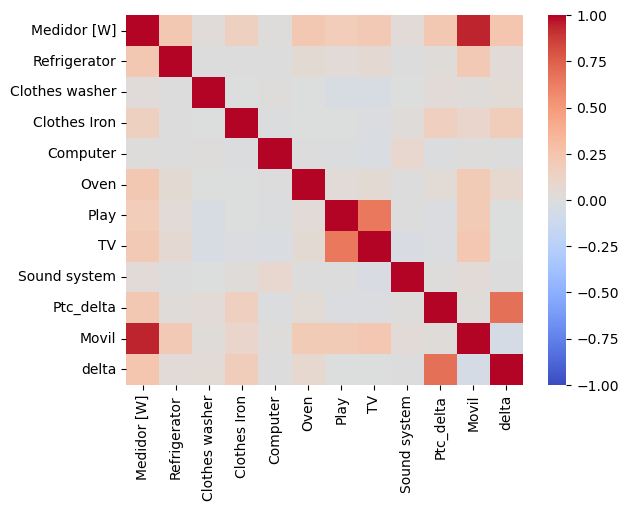

In [121]:
sns.heatmap(df_desagregado.corr(numeric_only=True), cmap="coolwarm", vmin=-1)

## Visualizando series de tiempo

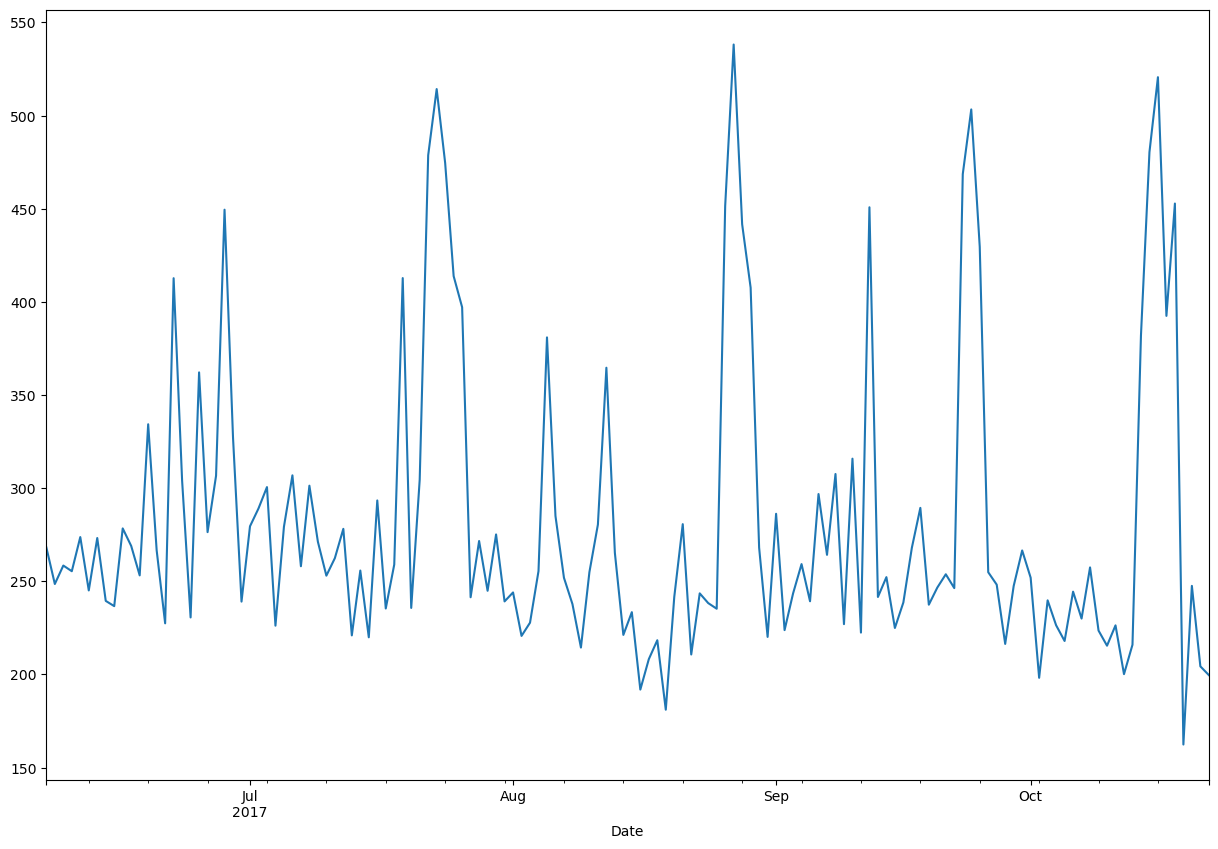

In [122]:
plt.figure(figsize=(15, 10))
df_desagregado.groupby("Date")["Medidor [W]"].mean().plot()
plt.show()

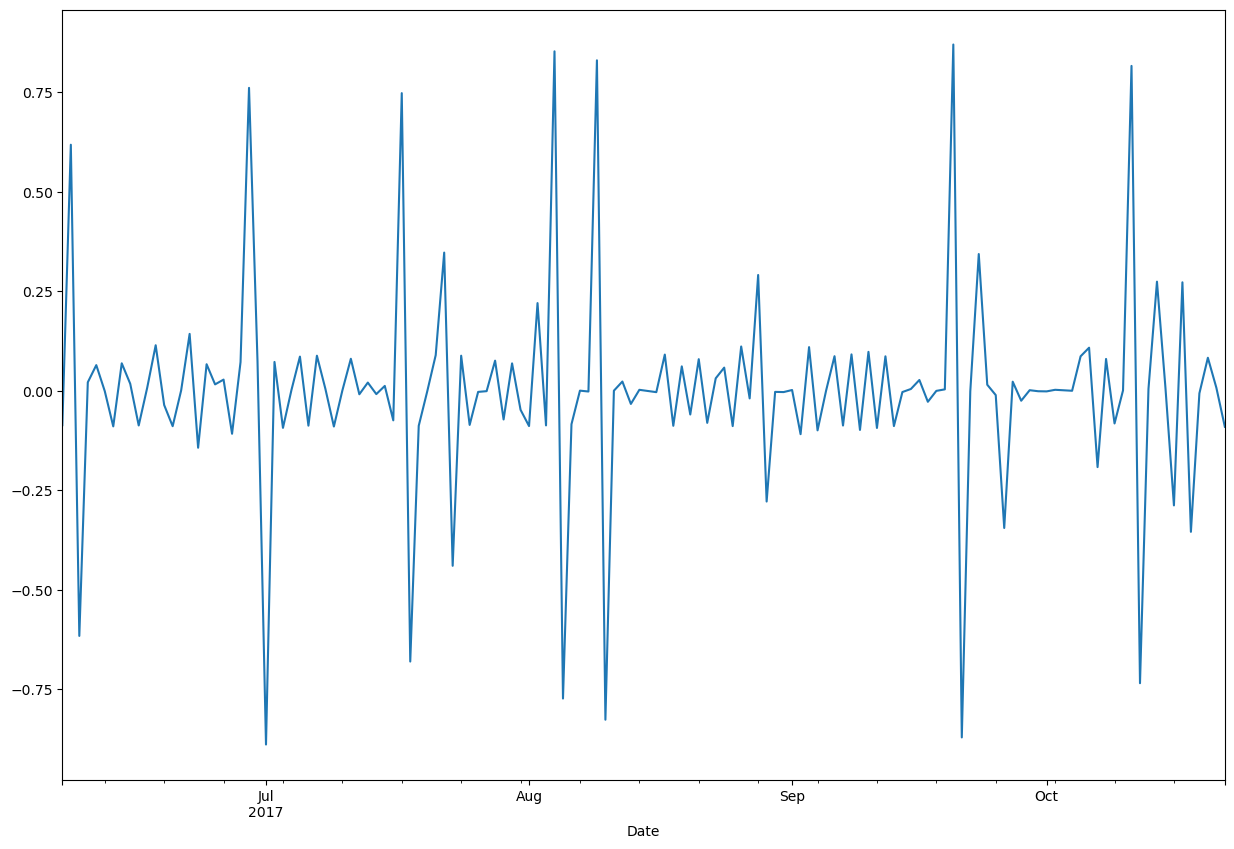

In [123]:
plt.figure(figsize=(15, 10))
df_desagregado.groupby("Date")["delta"].mean().plot()
plt.show()

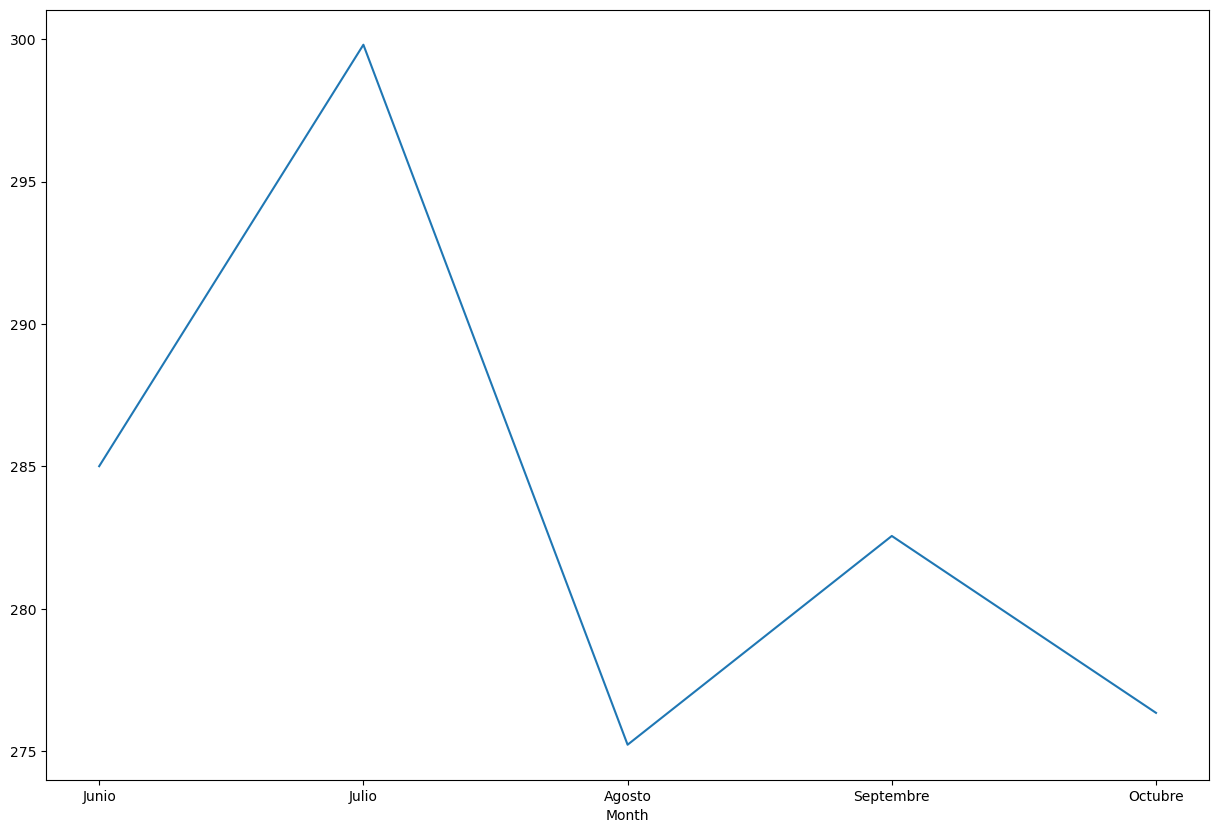

In [124]:
plt.figure(figsize=(15, 10))
df_desagregado.groupby("Month")["Medidor [W]"].mean().plot()
plt.xticks(range(len(df_desagregado.groupby("Month")["Medidor [W]"].mean().index) + 1, 11), ["Junio", "Julio", "Agosto", "Septembre", "Octubre"])
plt.show()

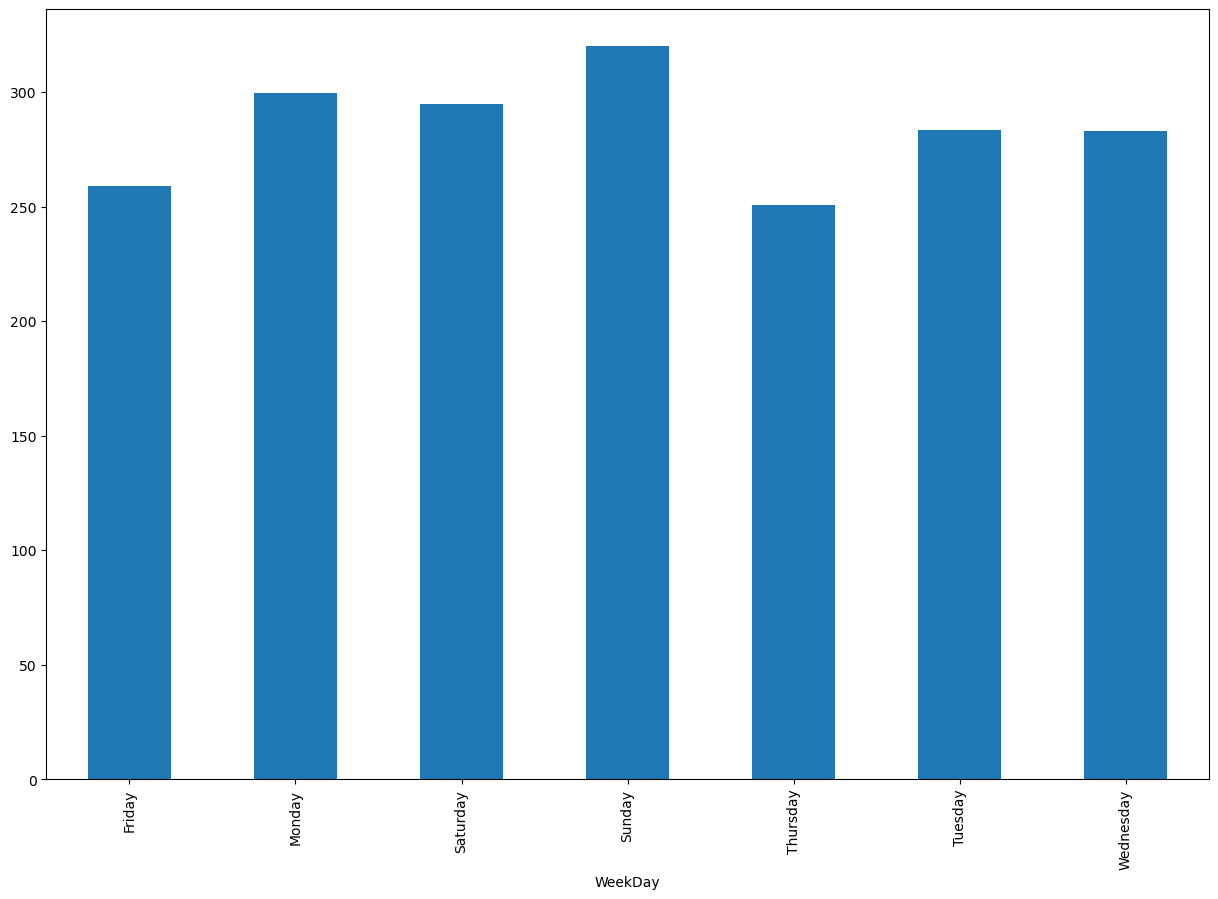

In [125]:
plt.figure(figsize=(15, 10))
df_desagregado.groupby("WeekDay")["Medidor [W]"].mean().plot(kind="bar")
plt.show()

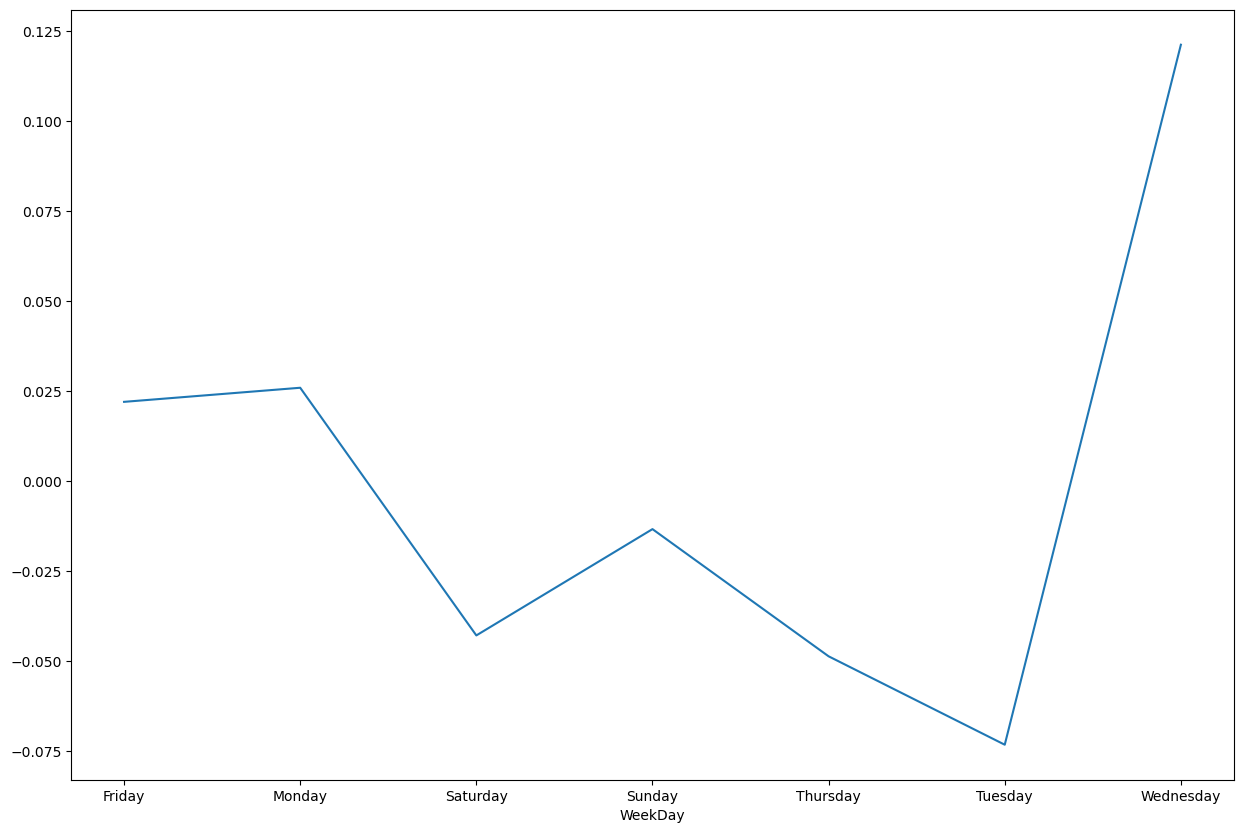

In [126]:
plt.figure(figsize=(15, 10))
df_desagregado.groupby("WeekDay")["delta"].mean().plot()
plt.show()

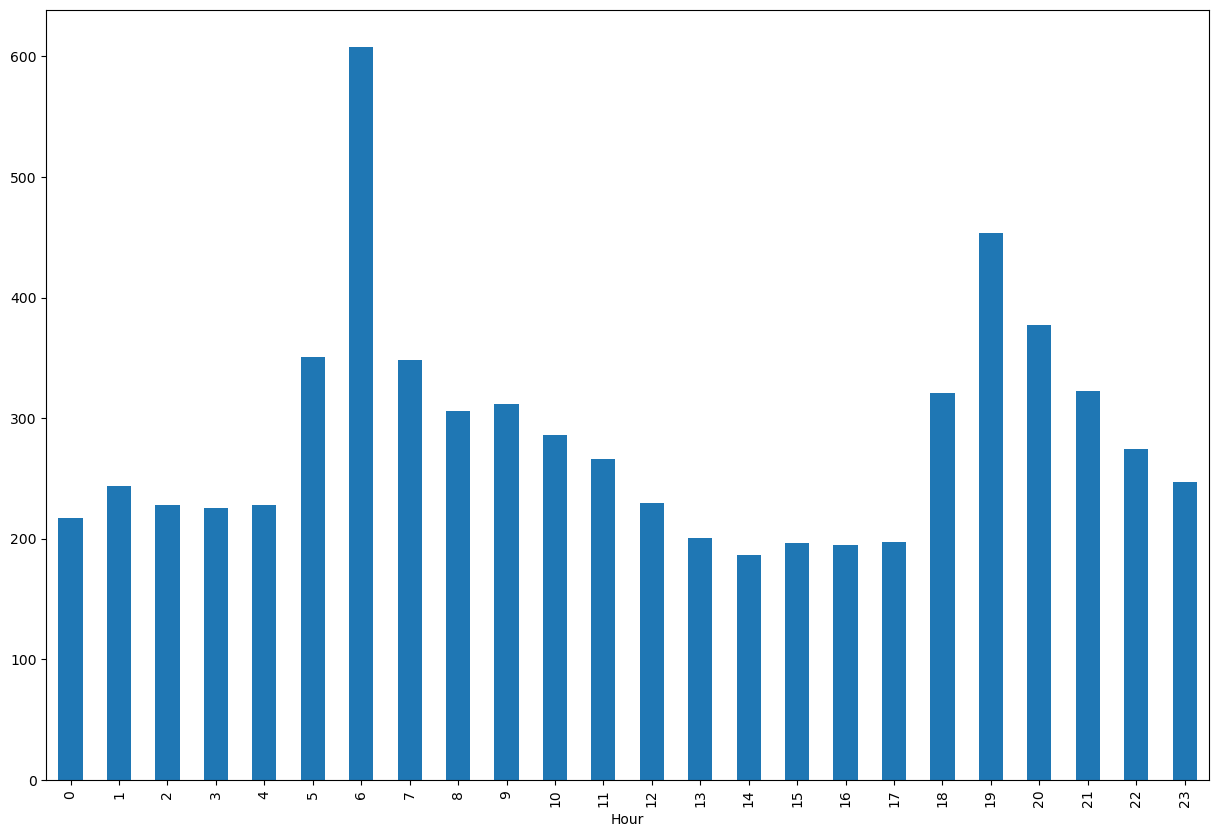

In [127]:
plt.figure(figsize=(15, 10))
df_desagregado.groupby("Hour")["Medidor [W]"].mean().plot(kind="bar")
plt.show()

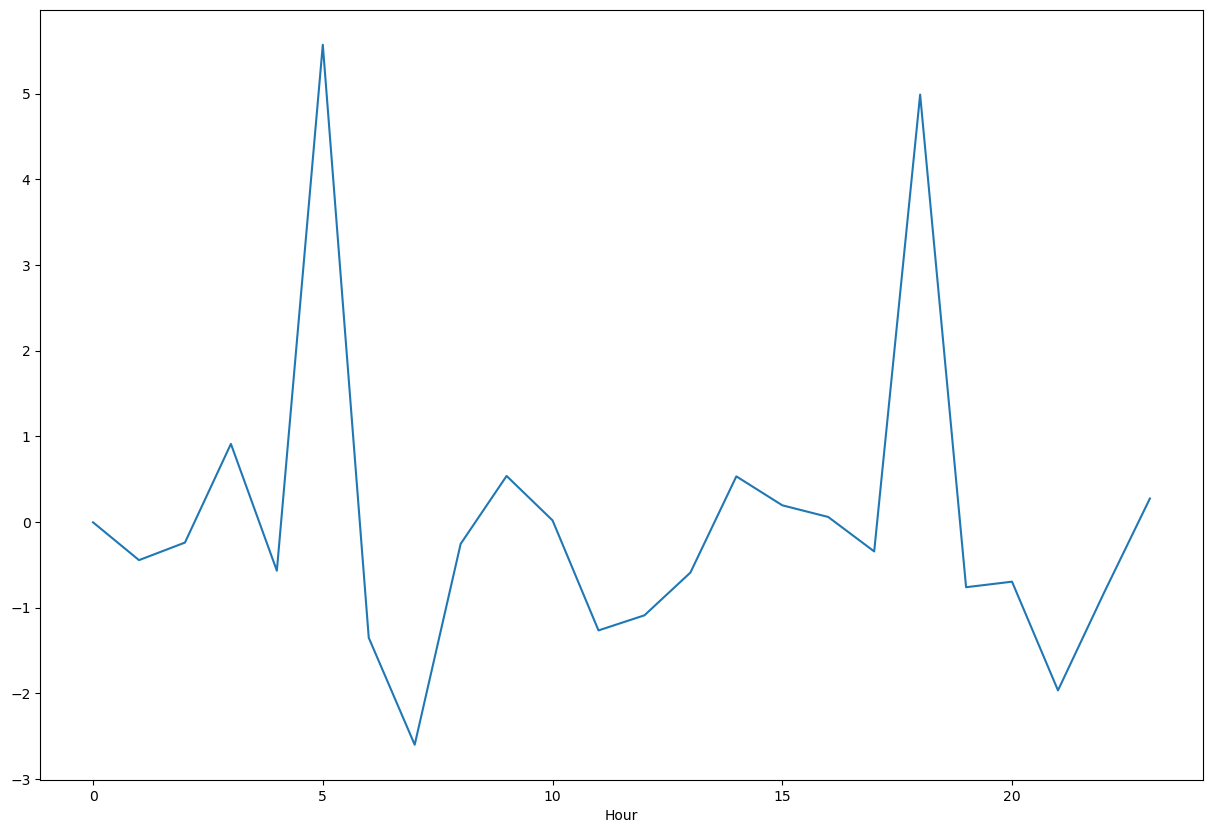

In [128]:
plt.figure(figsize=(15, 10))
df_desagregado.groupby("Hour")["delta"].mean().plot()
plt.show()

## Visualización por electrodomesticos

Refrigerator
Clothes washer
Clothes Iron
Computer
Oven
Play
TV
Sound system


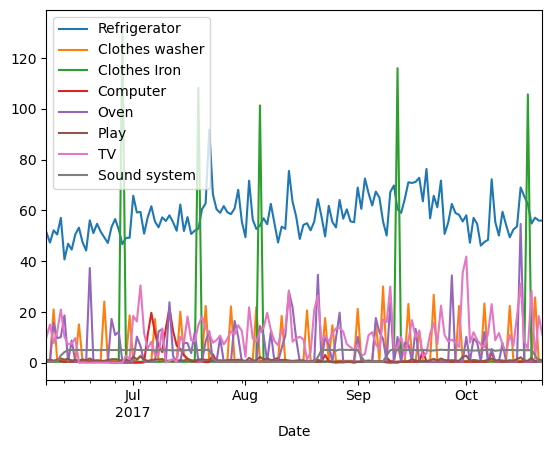

In [129]:
for i in electrodomestics:
    print(i)
    df_desagregado.groupby("Date")[i].mean().plot(label=i)
plt.legend()

<Axes: xlabel='Date'>

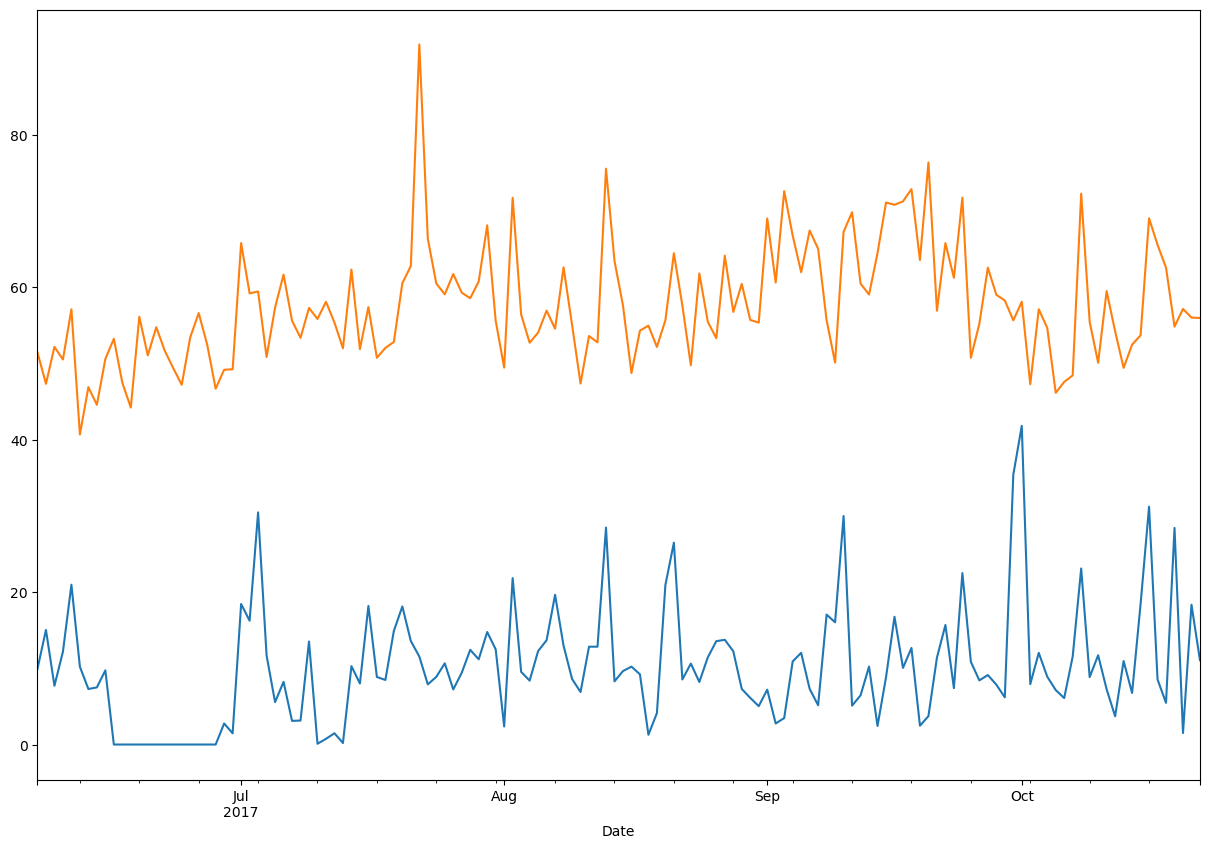

In [130]:
plt.figure(figsize=(15, 10))
df_desagregado.groupby("Date")["TV"].mean().plot()
df_desagregado.groupby("Date")["Refrigerator"].mean().plot()

c:\Users\JUAN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x1000 with 0 Axes>

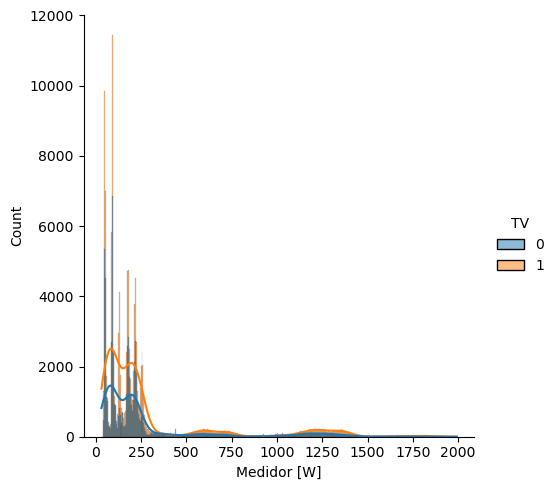

In [131]:
plt.figure(figsize=(20, 10))
sns.displot(df_cargas, x="Medidor [W]", hue="TV", kde=True)
plt.show()

## Combinatoria

In [132]:
def create_target(row):
    cols = df_cargas.columns[2:10]
    if '_'.join(cols[row == 1]):
        return '_'.join(cols[row == 1])
    else:
        return "Ninguno"
df_cargas['target'] = df_cargas[electrodomestics].apply(create_target, axis=1)

Clothes Iron_Play                                                                  1
Computer                                                                           1

In [133]:
df_cargas["target"].value_counts()

target
Refrigerator_Clothes washer_Clothes Iron_Computer_Oven_Play_TV_Sound system    21319
Refrigerator_Clothes washer_Clothes Iron_Computer_Oven_TV_Sound system         11074
Refrigerator_Clothes washer_Clothes Iron_Computer_Oven_Play_Sound system       10806
Refrigerator_Clothes washer_Clothes Iron_Oven_Play_TV_Sound system              8898
Refrigerator_Clothes washer_Computer_Oven_Play_TV_Sound system                  8273
                                                                               ...  
Clothes Iron_Computer                                                              3
Computer_TV                                                                        3
TV                                                                                 2
Clothes Iron_Play                                                                  1
Computer                                                                           1
Name: count, Length: 254, dtype: int64

In [134]:
index_to_drop = df_cargas[df_cargas["target"].isin(["Clothes Iron_Play", "Computer"])].index
df_cargas.drop(index_to_drop, inplace=True)

In [135]:
df_cargas.drop(electrodomestics, axis=1, inplace=True)

In [136]:
df_cargas.drop("WeekDayNumber", axis=1, inplace=True)

In [137]:
df_cargas

,Fecha,Medidor [W],Month,Day,Hour,Minutes,Date,WeekDay,Time,Ptc_delta,Movil,Hora_punta,delta,target
0,2017-06-07 00:00:00,228.887,6,7,0,0,2017-06-07,Wednesday,00:00:00,NaN,NaN,No pico,NaN,Refrigerator_Clothes washer_Computer_Oven_Soun...
1,2017-06-07 00:01:00,231.814,6,7,0,1,2017-06-07,Wednesday,00:01:00,1.278797,NaN,No pico,2.927,Refrigerator_Clothes washer_Computer_Oven_Soun...
2,2017-06-07 00:02:00,230.971,6,7,0,2,2017-06-07,Wednesday,00:02:00,-0.363654,230.557333,No pico,-0.843,Refrigerator_Clothes washer_Computer_Sound system
3,2017-06-07 00:03:00,231.878,6,7,0,3,2017-06-07,Wednesday,00:03:00,0.392690,231.554333,No pico,0.907,Refrigerator_Clothes Iron_Computer_Play_TV_Sou...
4,2017-06-07 00:04:00,189.225,6,7,0,4,2017-06-07,Wednesday,00:04:00,-18.394587,217.358000,No pico,-42.653,Clothes washer_Oven_TV_Sound system
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194118,2017-10-22 23:55:00,88.272,10,22,23,55,2017-10-22,Sunday,23:55:00,-1.820730,88.913333,No pico,-1.637,Refrigerator_Clothes washer_Oven_Play_TV_Sound...
194119,2017-10-22 23:56:00,86.386,10,22,23,56,2017-10-22,Sunday,23:56:00,-2.136578,88.189000,No pico,-1.886,Refrigerator_Clothes washer_Clothes Iron_Oven_...
194120,2017-10-22 23:57:00,85.766,10,22,23,57,2017-10-22,Sunday,23:57:00,-0.717709,86.808000,No pico,-0.620,Clothes washer_Clothes Iron_Oven_Play_TV_Sound...
194121,2017-10-22 23:58:00,87.665,10,22,23,58,2017-10-22,Sunday,23:58:00,2.214164,86.605667,No pico,1.899,Refrigerator_Clothes Iron_Oven_Play_TV_Sound s...


In [138]:
df_cargas.to_csv("../data/transformed/cargas_transformadas.csv", index=False)

## Reportes

In [139]:
# ProfileReport(df_cargas).to_file("../reports/cargas_report")